## Import libraries and dataset.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/heart.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data inspection and cleaning

In [3]:
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 918 rows, and 12 columns.
The rows represent 918 observations, and the columns represent 11 features and 1 target variable.


In [4]:
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


In [5]:
print(f'There are {df.duplicated().sum()} duplicates.')

There are 0 duplicates.


In [6]:
# Descriptive statistics for the numeric columns

df.describe(include="number")

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
# Descriptive statistics for the categorical columns

df.describe(include="object") 

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


## Define features (X) and target (y).

In [8]:
target = 'HeartDisease'
X = df.drop(columns = [target]).copy()
y = df[target].copy()

## Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.

C:\Users\dusti\AppData\Local\Temp\ipykernel_36100\4107700660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


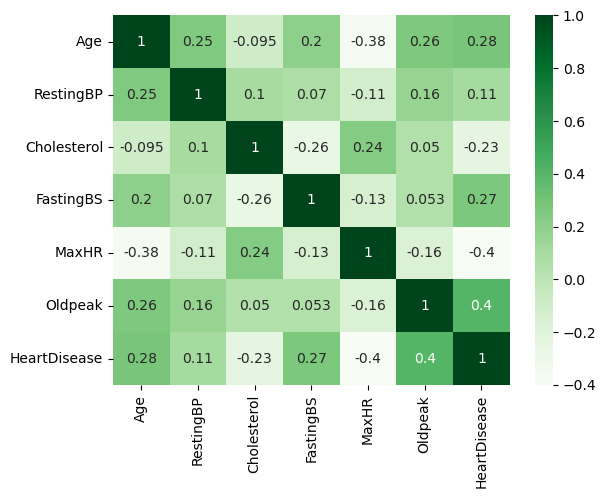

In [9]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

The heatmap above shows there is a positive correlation between HeartDisease and Oldpeak. 

The heatmap above shows there is a negative correlation between MaxHr and HeartDisease. 

## Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.

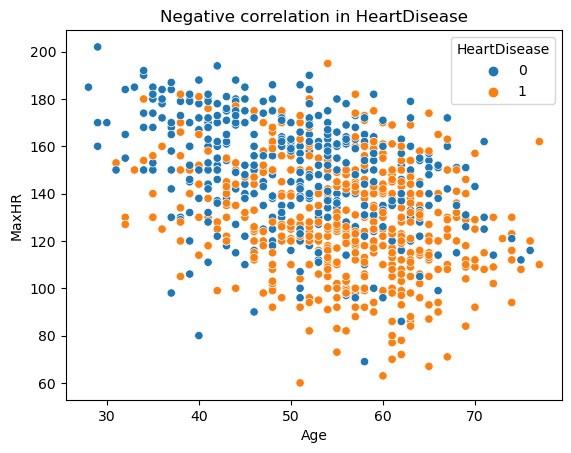

In [33]:
sns.scatterplot(data = df, x = 'Age', y = 'MaxHR', hue ='HeartDisease');

plt.title("Negative correlation in HeartDisease")
  
plt.show() 

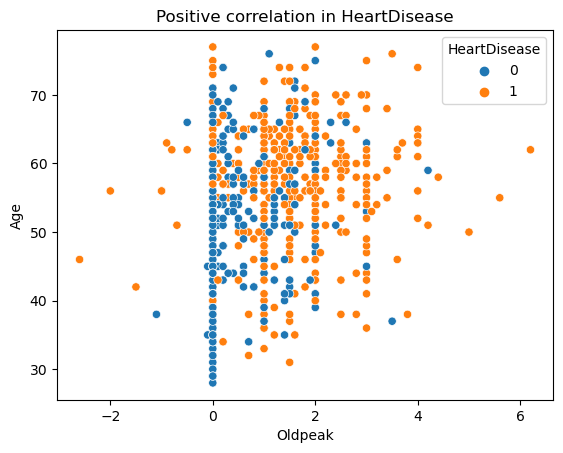

In [34]:
sns.scatterplot(data = df, x = 'Oldpeak', y = 'Age', hue ='HeartDisease');

plt.title("Positive correlation in HeartDisease")
  
plt.show() 

## Analysis

The two visualizations above prove the correlations described.

In the 'Negative correlation in HeartDisease' visual, we see that as an individual's age increases, their MaxHR decreases and makes them more likely to have HeartDisease.

In the 'Positive correlation in HeartDisease' visual, we see that as an individual's age and oldpeak increases, so does their likelihood of having HeartDisease.